# Übung Binäre Klassifikation/Logistische Regression

### Binäre Klassifikation an einem generischen Datenset

Als Einführung in die binäre Klassifikation generieren wir ein Training Set bestehend aus 200 Training Examples $\vec{x}^{(i)}\in\mathbb{R}^2$ ($i=1,\ldots,200$). 
Wir wählen je 100 Training Examples für jede Klasse, d.h. für die zugehörigen Targets gilt $y^{(i)}=0$ für $1\leq i \leq 100$ und $y^{(i)}=1$ für $101\leq i \leq 200$.

- Gehen Sie durch folgende Code-Zeilen und erklären Sie in Worten, wie die Daten generiert werden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[2],[2]]) + 2*np.random.randn(2,100)
y1 = np.zeros((100))
X2 = np.array([[-2],[-2]]) + 2*np.random.randn(2,100)
y2 = np.ones((100))

X = np.hstack((X1,X2))
y = np.hstack((y1,y2))


plt.scatter(X[0,:],X[1,:],c=y)
plt.grid()
plt.show()


<Figure size 640x480 with 1 Axes>

- Bereiten Sie die Daten für das Gradient Descent Verfahren auf (d.h. bringen Sie die Targets y mit np.reshape auf die richtige Form und schreiben Sie füllen Sie die erste Zeile der Datenmatrix X mit 1 auf).

In [2]:
y = np.reshape(y,(200,1))
X = np.vstack((np.ones((1,200)),X))

print(X.shape)
print(y.shape)

(3, 200)
(200, 1)


Nutzen Sie die Testdaten von oben um 

- das Gradient Descent Verfahren durchzuführen.
- einen geeigneten Plot zu erstellen, der die Boundary zwischen den beiden Klassen 0 und 1 enthält.
- prozentual die von der Hypothese korrekt berechneten Targets anzugeben.

[[ 0.52033392]
 [-1.29664332]
 [-1.19266892]]


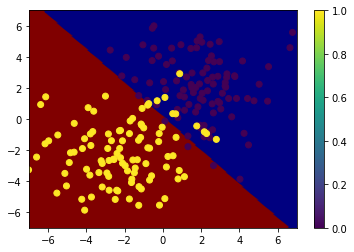

0.925


In [6]:
w = np.random.randn(3,1)*0.1
alpha = 0.03
iterations = 10000

################
# Your code here
################
for k in range(iterations):
    w = w - alpha*np.dot(X, 1.0/(np.exp(-np.dot(X.T,w)) + 1) - y)
print(w)
    
# Anlegen des Gitters für den Plot der Entscheidungsebene.    
S=200
X_p,Y_p = np.meshgrid(np.linspace(-7,7,S),np.linspace(-7,7,S))
X_p = X_p.reshape(1,S**2)
Y_p = Y_p.reshape(1,S**2) 
X_p = np.vstack((X_p,Y_p))
X_p = np.vstack((np.ones((1,S**2)),X_p))

################
# Your code here
################
pred =   np.reshape(np.round(1.0/(np.exp(-np.dot(X_p.T,w)) + 1)),(S**2))

plt.scatter(X_p[1, :], X_p[2, :], c=pred,cmap='jet')

plt.scatter(X[1,:],X[2,:],c=np.reshape(y,(200)))
plt.axis([-7, 7, -7, 7])
plt.colorbar()
plt.show()

################
# Your code here
################

# Berechne die prozentual richtig prognostizierten Targets
print(np.mean(np.round(1.0/(np.exp(-np.dot(X.T,w)) + 1))== y ))


In [60]:
np.mean(np.round(1.0/(np.exp(-np.dot(X.T,w)) + 1))==y)

0.95

- Wiederholen Sie die wesentlichen Punkte von oben mittels sklearn (die Plots brauchen Sie nicht erneut generieren).

In [75]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()

print(X[1:3,:].T.shape)
print(y.shape)
logr.fit(X[1:3,:].T, y)


prob = logr.predict_proba(X[1:3,:].T)
np.sum(prob[184,:])

(200, 2)
(200, 1)


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

### Binäre Klassifikation am Beispiel von MINST

Die MNIST-Datenbank (Modified National Institute of Standards und Technology Database) ist eine Datenbank mit handschriftlichen Ziffern, die üblicherweise für das Training von Machine Learning Algorithmen verwendet wird. Die MNIST Daten sind in sklearn enthalten. 

Wir lesen dies Daten zweier Zahlen (z.B. 3 und 8) ein.

(70000, 784)
(70000,)
(13966, 784)
13966 784


array([3., 3., 3., ..., 8., 8., 8.])

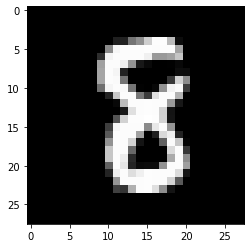

In [90]:
import numpy as np


from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original',data_home='mnist_data')
X,y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

y_0 = y[y ==3] 
X_0 = X[y ==3]
y_1 = y[y ==8] 
X_1 = X[y==8]
X = np.vstack((X_0,X_1))
y = np.hstack((y_0,y_1))
print(X.shape)
m,n = X.shape
print(m,n)

# Plotten Sie eine beliebige Ziffer
plt.imshow(X[13000,:].reshape(28,28),cmap='gray')
y

Nutzen Sie im folgenden wieder sklearn, um

- das gesamte Training Set in einen Teil für das Training und einen Teil für die Validierung zu splitten
- die logistische Regression durchzuführen
- die Confusion Matrix zu berechnen

In [91]:
from sklearn import linear_model
from sklearn import metrics

# Wir splitten das gesamte Training Set in einen Teil für das Training und einen Teil für die Validierung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wir führen die logistische Regression durch
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
#w_0, w_1 = logr.intercept_ , logr.coef_

print(logr.score(X_test,y_test))


# Wir berechnen die Confusion-Matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

0.9516821760916249
[[1362   77]
 [  58 1297]]
